# Data Mining Practical Works

# TP2- Exercise 5: How define the number of clusters?

In previous exercises number of clusters was equal to 3 (decided visually). 
In this exercise, you are given a dataset of the measurements of samples of grain (dataset/seeds.csv). What's a good number of clusters in this case?


**Step 1:** Load the dataset. Remove for the moment the column `grain_variety`.

In [2]:
import pandas as pd

df = pd.read_csv('dataset/seeds.csv')
df.drop(['grain_variety'], axis=1, inplace=True)

**Step 2:** Display the DataFrame to inspect the data.  Notice that there are 7 columns - so each grain sample (row) is a point in 7D space!  Scatter plots can't help us here.

In [3]:
df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


**Step 3:** Extract the samples from the DataFrame using its `.values` attribute:

In [4]:
arr = df.values

**Step 4:**  Measure the quality of clusterings with different numbers of clusters (range:[1,6]) using the
inertia. (The idea behind good clustering is having a small value of inertia, and small number of clusters.)

For each of the given values of `k`, perform the following steps:

  - Create a `KMeans` instance called `model` with `k` clusters.
  - Fit the model to the grain data `samples`.
  - Append the value of the `inertia_` attribute of `model` to the list `inertias`.

In [5]:
from sklearn.cluster import KMeans

inertias = []
for k in range(1,6):
    model = KMeans(n_clusters=k)
    model.fit(arr)
    inertias.append(model.inertia_)

**Step 5:**  Plot the inertia to see which number of clusters is best. What do you observe?

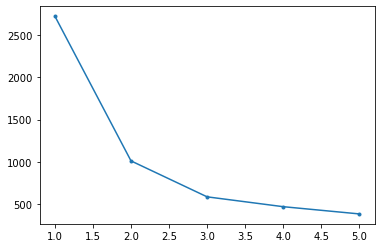

In [6]:
from matplotlib import pyplot as plt

plt.plot(range(1,6), inertias, '.-');

**Step 6:** Apply the selected number of clusters to the KMeans model. Fit the KMeans model to the data. Predict the labels. Plot the clusters (for xs consider column `0`, for ys consider columns `2`). What do you observe?

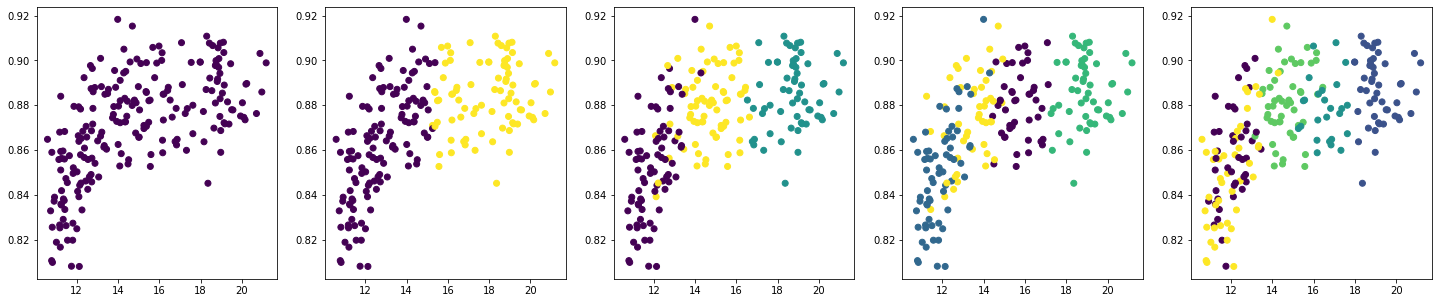

In [24]:
fig, axs = plt.subplots(1,5,figsize=(25,5))
for k in range(1,6):
    model = KMeans(n_clusters=k)
    model.fit(arr)
    labels = model.predict(arr)

    axs[k-1].scatter(arr[:,0], arr[:,2], c=labels);

# TP2- Exercise 6: Scaling data for clustering

You are given an array `samples` giving measurements of fish.  Each row represents asingle fish.  The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales.  In order to cluster this data effectively, you'll need to standardize these features first.  In this exercise, you'll build a pipeline to standardize and cluster the data.


**Step 1:** Load the dataset (fish.csv).

In [8]:
df = pd.read_csv('dataset/fish.csv')

**Step 2:** Call `df.head()` to inspect the dataset:

In [9]:
df.head()

,species,weight,length1,length2,length3,height,width
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


**Step 3:** Remove the `species` column, only the measurements are left. Extract all the measurements as a 2D NumPy array, assigning to `samples` (hint: use the `.values` attribute of `df`)

In [10]:
species_arr = df['species']
df.drop(['species'], axis=1, inplace=True)

**Step 4:** Perform the necessary imports:

- `make_pipeline` from `sklearn.pipeline`.
- `StandardScaler` from `sklearn.preprocessing`.
- `KMeans` from `sklearn.cluster`.

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

**Step 5:** Create an instance of `StandardScaler` called `scaler`.

In [12]:
scaler = StandardScaler()

**Step 6:** Create an instance of `KMeans` with `4` clusters called `kmeans`.

In [13]:
kmeans = KMeans(n_clusters=4)

**Step 7:** Create a pipeline called `pipeline` that chains `scaler` and `kmeans`. To do this, you just need to pass them in as arguments to `make_pipeline()`.

In [14]:
pipeline = make_pipeline(scaler, kmeans)

# TP2- Exercise 7: Clustering the standardized data

Now use your standardization and clustering pipeline from the previous exercise to cluster the fish by their measurements, and then create a cross-tabulation to compare the cluster labels with the fish species.

**Step 1:** Fit the pipeline to the fish measurements `samples`.

In [15]:
samples = df.values
pipeline.fit(samples)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4))])

**Step 2:** Obtain the cluster labels for `samples` by using the `.predict()` method of `pipeline`, assigning the result to `labels`.

In [16]:
labels = pipeline.predict(samples)

**Step 3:** Using `pd.DataFrame()`, create a DataFrame `df2` with two columns named `'labels'` and `'species'`, using `labels` and `species`, respectively, for the column values.

In [17]:
df2 = pd.DataFrame({'labels': labels, 'species': species_arr})
df2.head()

,labels,species
0,3,Bream
1,0,Bream
2,0,Bream
3,0,Bream
4,0,Bream


**Step 4:** Using `pd.crosstab()`, create a cross-tabulation `ct` of `df2['labels']` and `df2['species']`.

In [18]:
ct = pd.crosstab(df2['labels'], df2['species'])

**Step 5:** Display the cross-tabulation. What do you observe?

In [19]:
ct

species,Bream,Pike,Roach,Smelt
labels,,,,
0,33,0,1,0
1,0,0,0,13
2,0,17,0,0
3,1,0,19,1


Most bream species are labeled as 2, all pikes are labels as 1, most roaches are labeled as 0 and most smelts are labeled as 3.